# HEP Jet assignment project - Data analysis and particle finding script

## Import essential packages.
---
* We will use [uproot](https://github.com/scikit-hep/uproot) packages to parse our .root file.
* The content of function `particle properties` and `jet properties` is defined in `particle_properties.py` and `jet_properties.py`.

In [1]:
!pip3 install numpy pandas h5py tqdm uproot 
import uproot
import pandas as pd 
import numpy as np 
from particle_properties_uproot import particle_properties  #import particle properties helper function from particle_properties.py
from jet_properties_uproot import jet_properties  #import jet properties helper function from jet_properties.py
import h5py, tqdm

In [2]:
INPUT_FILE_PRIFIX = '/home/david/bkg/Events/' 


data = []
particle = []
jet = []
for i in tqdm.trange(1, 11):
    if i < 10:
        FILE_NAME = ""
        seq = (INPUT_FILE_PRIFIX, 'run_0',str(i),'/tag_1_delphes_events.root')
        try:
            tmp = uproot.open(FILE_NAME.join(seq))['Delphes']
            data.append(tmp)
        except:
            print('Please check input file path.')
    if i > 9:
        print(i)
        FILE_NAME = ""
        seq = (INPUT_FILE_PRIFIX, 'run_',str(i),'/tag_1_delphes_events.root')
        try:
            tmp = uproot.open(FILE_NAME.join(seq))['Delphes']
            data.append(tmp)
        except:
            print('Please check input file path.')


100%|██████████| 10/10 [00:01<00:00,  6.89it/s]10



In [3]:
class properties_for_particle():
    def __init__(self, event, pt, eta, phi, pid, M1, M2, D1, D2, status, rapidity, mass, charge):
        self.event = event
        self.pt = pt
        self.eta = eta
        self.phi = phi
        self.pid = pid
        self.M1 = M1
        self.M2 = M2
        self.D1 = D1
        self.D2 = D2
        self.status = status
        self.rapidity = rapidity
        self.mass = mass
        self.charge = charge
    def dataframelize(self, index):

        idx = np.linspace(0, len( self.pt[index])-1, num = len( self.pt[index]) )

        patron_dict = {
                "Index": idx,
                "Status":  self.status[index],
                "Mother_1":  self.M1[index],
                "Mother_2":  self.M2[index],
                "Daughter_1":  self.D1[index],
                "Daughter_2":  self.D2[index],
                "PID":  self.pid[index],
                "PT":  self.pt[index],
                "Eta":  self.eta[index],
                "Phi":  self.phi[index],
                "Mass":  self.mass[index]
            }
        patron_df = pd.DataFrame(patron_dict)
        return patron_df

class properties_for_jet():
    def __init__(self, event, pt, eta, phi, btag, area, mass, charge):
        self.event = event
        self.pt = pt
        self.eta = eta
        self.phi = phi
        self.btag = btag
        self.area = area
        self.mass = mass
        self.charge = charge
    def dataframelize(self, index):

        idx = np.linspace(0, len( self.pt[index])-1, num = len( self.pt[index]) )

        patron_dict = {
                "Index": idx,
                "PT":  self.pt[index],
                "Eta":  self.eta[index],
                "Phi":  self.phi[index],
                "Mass":  self.mass[index],
                "Btag": self.btag[index],
                "Area": self.area[index]
            }
        patron_df = pd.DataFrame(patron_dict)
        return jet_df
    

In [4]:

for i in tqdm.trange(0, 10):
    tmp_particle = particle_properties(data[i])
    tmp_jet = jet_properties(data[i])

    if i == 0 :
        _particle_event = tmp_particle.event
        _particle_pt = tmp_particle.pt
        _particle_eta = tmp_particle.eta
        _particle_phi = tmp_particle.phi
        _particle_pid = tmp_particle.pid
        _particle_M1 = tmp_particle.M1
        _particle_M2 = tmp_particle.M2
        _particle_D1 = tmp_particle.D1
        _particle_D2 = tmp_particle.D2
        _particle_status = tmp_particle.status
        _particle_rapidity = tmp_particle.rapidity
        _particle_mass = tmp_particle.mass
        _particle_charge = tmp_particle.charge

        _jet_event = tmp_jet.event
        _jet_pt = tmp_jet.pt
        _jet_eta = tmp_jet.eta
        _jet_phi = tmp_jet.phi
        _jet_btag = tmp_jet.btag
        _jet_area = tmp_jet.area
        _jet_mass = tmp_jet.mass
        _jet_charge = tmp_jet.charge
        
    else :
        _particle_event = np.concatenate((_particle_event, tmp_particle.event))
        _particle_pt = np.concatenate((_particle_pt, tmp_particle.pt))
        _particle_eta = np.concatenate((_particle_eta, tmp_particle.eta))
        _particle_phi = np.concatenate((_particle_phi, tmp_particle.phi))
        _particle_pid = np.concatenate((_particle_pid, tmp_particle.pid))
        _particle_M1 = np.concatenate((_particle_M1, tmp_particle.M1))
        _particle_M2 = np.concatenate((_particle_M2, tmp_particle.M2))
        _particle_D1 = np.concatenate((_particle_D1, tmp_particle.D1))
        _particle_D2 = np.concatenate((_particle_D2, tmp_particle.D2))
        _particle_status = np.concatenate((_particle_status, tmp_particle.status))
        _particle_rapidity = np.concatenate((_particle_rapidity, tmp_particle.rapidity))
        _particle_mass = np.concatenate((_particle_mass, tmp_particle.mass))
        _particle_charge = np.concatenate((_particle_charge, tmp_particle.charge))

        _jet_event = np.concatenate((_jet_event, tmp_jet.event))
        _jet_pt = np.concatenate((_jet_pt, tmp_jet.pt))
        _jet_eta = np.concatenate((_jet_eta, tmp_jet.eta))
        _jet_phi = np.concatenate((_jet_phi, tmp_jet.phi))
        _jet_btag = np.concatenate((_jet_btag, tmp_jet.btag))
        _jet_area = np.concatenate((_jet_area, tmp_jet.area))
        _jet_mass = np.concatenate((_jet_mass, tmp_jet.mass))
        _jet_charge = np.concatenate((_jet_charge, tmp_jet.charge))


100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


In [5]:
clustered_particle_data = properties_for_particle(_particle_event, _particle_pt, _particle_eta, _particle_phi, _particle_pid, _particle_M1, _particle_M2, _particle_D1, _particle_D2, _particle_status, _particle_rapidity, _particle_mass, _particle_charge)

clustered_jet_data = properties_for_jet(_jet_event, _jet_pt, _jet_eta, _jet_phi, _jet_btag, _jet_area, _jet_mass, _jet_charge)

In [6]:
Length = len(clustered_particle_data.event)
test_length = 10

PID_W_plus = 24 
PID_W_minus = -24
PID_DOWN = 1
PID_DOWN_VAR = -1
PID_UP = 2
PID_UP_BAR = -2
PID_STRANGE = 3
PID_STRANGE_BAR = -3
PID_CHARM = 4
PID_CHARM_BAR = -4
PID_BOTTOM = 5
PID_BOTTOM_BAR = -5
PID_TOP = 6
PID_TOP_BAR = -6
PID_HIGGS = 25

top_idx = np.zeros(len(clustered_particle_data.event))
top_daughter_idx_1 = np.zeros(len(clustered_particle_data.event))
top_daughter_pid_1 = np.zeros(len(clustered_particle_data.event))
top_daughter_idx_2 = np.zeros(len(clustered_particle_data.event))
top_daughter_pid_2 = np.zeros(len(clustered_particle_data.event))

top_bar_idx = np.zeros(len(clustered_particle_data.event))
top_bar_daughter_idx_1 = np.zeros(len(clustered_particle_data.event))
top_bar_daughter_pid_1 = np.zeros(len(clustered_particle_data.event))
top_bar_daughter_idx_2 = np.zeros(len(clustered_particle_data.event))
top_bar_daughter_pid_2 = np.zeros(len(clustered_particle_data.event))

higgs_idx = np.zeros(len(clustered_particle_data.event))
higgs_daughter_idx_1 = np.zeros(len(clustered_particle_data.event))
higgs_daughter_pid_1 = np.zeros(len(clustered_particle_data.event))
higgs_daughter_idx_2 = np.zeros(len(clustered_particle_data.event))
higgs_daughter_pid_2 = np.zeros(len(clustered_particle_data.event))

parton_array = np.zeros([ len(clustered_particle_data.event) , 8, 7])

#Generate maker for each stage(event selection and jet selection.)
"""
*******************************************************************
*                           Cutflow                               *
*******************************************************************

C1: 4 jet passing pt>25 GeV and |eta| < 2.5
C2: 5 jet passing pt>25 GeV and |eta| < 2.5
C3: 6 jet passing pt>25 GeV and |eta| < 2.5
C4: 6 jet with 1 bjet passing pt>25 GeV and |eta| < 2.5
C5: 6 jet with 2 bjet passing pt>25 GeV and |eta| < 2.5

"""
marker_event_C1 = []
marker_event_C2 = []
marker_event_C3 = []
marker_event_C4 = []
marker_event_C5 = []
marker_jet = []
marker_bjet = []


for i in range(len(clustered_particle_data.event)):
    marker_event_C1.append(0)
    marker_event_C2.append(0)
    marker_event_C3.append(0)
    marker_event_C4.append(0)
    marker_event_C5.append(0)
    marker_jet.append(np.zeros([len(clustered_jet_data.pt[i])]))
    marker_bjet.append(np.zeros([len(clustered_jet_data.pt[i])]))

marker_event_C1 = np.asanyarray(marker_event_C1, dtype=object)
marker_event_C2 = np.asanyarray(marker_event_C2, dtype=object)
marker_event_C3 = np.asanyarray(marker_event_C3, dtype=object)
marker_event_C4 = np.asanyarray(marker_event_C4, dtype=object)
marker_event_C5 = np.asanyarray(marker_event_C5, dtype=object)
marker_jet = np.asanyarray(marker_jet, dtype=object)
marker_bjet = np.asanyarray(marker_bjet, dtype=object)

#Mark which jet in each event pass the selection.
print("\n")
print("+------------------------------------------------------------------------------------------------------+")
print("Starting jet selection.")
print("+------------------------------------------------------------------------------------------------------+")
for i in tqdm.trange(len(clustered_particle_data.event)):
    for j in range(len(clustered_jet_data.pt[i])):
        if clustered_jet_data.btag[i][j] == 1 and clustered_jet_data.pt[i][j] > 25 and np.abs(clustered_jet_data.eta[i][j]) < 2.5:
            marker_bjet[i][j] = 1 
        else: pass 
    
        if clustered_jet_data.pt[i][j] > 25 and np.abs(clustered_jet_data.eta[i][j]) <= 2.5:
            marker_jet[i][j] = 1
        else: pass 

for i in tqdm.trange(len(clustered_particle_data.event)):
    if np.sum(marker_jet[i] == 1) >= 4 :
        marker_event_C1[i] = 1 
    if np.sum(marker_jet[i] == 1) >= 5 :
        marker_event_C2[i] = 1 
    if np.sum(marker_jet[i] == 1) >= 6 :
        marker_event_C3[i] = 1 
    if np.sum(marker_jet[i] == 1) >= 6 and np.sum(marker_bjet[i] == 1) >= 1 :
        marker_event_C4[i] = 1 
    if np.sum(marker_jet[i] == 1) >= 6 and np.sum(marker_bjet[i] == 1) >= 2 :
        marker_event_C5[i] = 1 
print("\n")
print("+------------------------------------------------------------------------------------------------------+")
print("Jet selection done.\n{0:5} events has been selected in C1.\n{1:5} events has been selected in C2.\n{2:5} events has been selected in C3.\n{3:5} events has been selected in C4.\n{4:5} events has been selected in C5.".format(np.sum(marker_event_C1 == 1), np.sum(marker_event_C2 == 1), np.sum(marker_event_C3 == 1), np.sum(marker_event_C4 == 1), np.sum(marker_event_C5 == 1)))
print("+------------------------------------------------------------------------------------------------------+")

9%|▊         | 8697/100000 [00:00<00:02, 43334.99it/s]

+------------------------------------------------------------------------------------------------------+
Starting jet selection.
+------------------------------------------------------------------------------------------------------+
100%|██████████| 100000/100000 [00:02<00:00, 37064.48it/s]

+------------------------------------------------------------------------------------------------------+
Jet selection doen.
14819 events has been selected in C1.
 5182 events has been selected in C2.
 1568 events has been selected in C3.
  311 events has been selected in C4.
   80 events has been selected in C5.
+------------------------------------------------------------------------------------------------------+



In [10]:
cutflow = np.zeros(7)
cutflow[0] = len(marker_event_C1)
cutflow[1] = len(marker_event_C1)
cutflow[2] = np.sum(marker_event_C1 == 1)
cutflow[3] = np.sum(marker_event_C2 == 1)
cutflow[4] = np.sum(marker_event_C3 == 1)
cutflow[5] = np.sum(marker_event_C4 == 1)
cutflow[6] = np.sum(marker_event_C5 == 1)

In [11]:
import matplotlib.pyplot as plt 

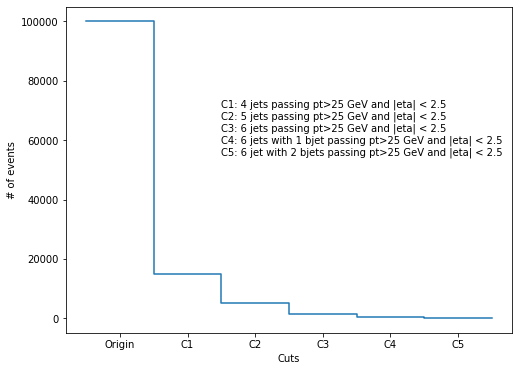

In [38]:
x = np.linspace(0,6,7)
plt.figure(figsize=(8,6))
plt.step(x, cutflow)
plt.xlabel("Cuts")
plt.ylabel("# of events")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5],[ "Origin", "C1", "C2", "C3", "C4", "C5"])
plt.text(2,5.5e4,"C1: 4 jets passing pt>25 GeV and |eta| < 2.5\nC2: 5 jets passing pt>25 GeV and |eta| < 2.5\nC3: 6 jets passing pt>25 GeV and |eta| < 2.5\nC4: 6 jets with 1 bjet passing pt>25 GeV and |eta| < 2.5\nC5: 6 jet with 2 bjets passing pt>25 GeV and |eta| < 2.5")
plt.show()